In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_train = pd.read_csv('../data/train.tsv', delimiter='\t')
df_test = pd.read_csv('../data/test.tsv', delimiter='\t')

In [4]:
df_train.describe()

,Unnamed: 0,GameID,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,...,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilityUsed,MaxTimeStamp
count,1697.000000,1697.000000,1697.000000,1670.000000,1669.000000,1669.000000,1697.000000,1697.000000,1697.000000,1697.000000,...,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000,1697.000000
mean,1713.156747,4786.693577,4.142605,21.604192,15.931696,1262.105452,116.843045,0.004271,0.000367,0.000058,...,0.003439,40.171208,63.748563,5.288991,0.000285,0.001026,0.000085,0.000057,0.000139,82579.363583
std,970.723900,2722.454905,1.539092,4.223913,11.571388,24480.500281,51.851132,0.005353,0.000225,0.000039,...,0.000985,16.787703,19.239956,1.411930,0.000089,0.000510,0.000025,0.000111,0.000261,32152.611878
min,0.000000,52.000000,1.000000,16.000000,2.000000,10.000000,25.444200,0.000000,0.000000,0.000000,...,0.000887,6.666700,24.093600,2.038900,0.000108,0.000161,0.000020,0.000000,0.000000,25224.000000
25%,870.000000,2423.000000,3.000000,18.000000,8.000000,300.000000,80.002200,0.001236,0.000200,0.000031,...,0.002736,28.664600,50.018300,4.337100,0.000225,0.000677,0.000068,0.000000,0.000000,59992.000000
50%,1738.000000,4817.000000,4.000000,21.000000,12.000000,500.000000,108.002400,0.002399,0.000347,0.000053,...,0.003389,36.939000,60.252800,5.108800,0.000270,0.000906,0.000082,0.000000,0.000018,80224.000000
75%,2534.000000,7110.000000,5.000000,24.000000,20.000000,800.000000,141.372600,0.005117,0.000493,0.000079,...,0.004019,48.297100,74.555100,6.033900,0.000327,0.001256,0.000098,0.000074,0.000183,101132.000000
max,3394.000000,10094.000000,8.000000,44.000000,140.000000,1000000.000000,375.866400,0.043088,0.001750,0.000293,...,0.007971,156.623400,165.161300,14.607100,0.000745,0.004120,0.000202,0.000902,0.003084,241196.000000


<AxesSubplot:xlabel='TotalHours'>

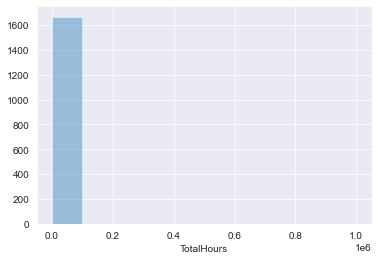

In [22]:
sns.distplot(df_train['TotalHours'].dropna(), bins = 10, kde=False, rug=False)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

x = []
nan = np.nan
for i in df_train["TotalHours"]:
    if i == nan:
        print(nan)
        continue

    print(i)
    x.append(int(i))
# ヒストグラムを出力
plt.hist(x)

365.0
250.0
600.0
400.0
1260.0
250.0
nan


ValueError: cannot convert float NaN to integer

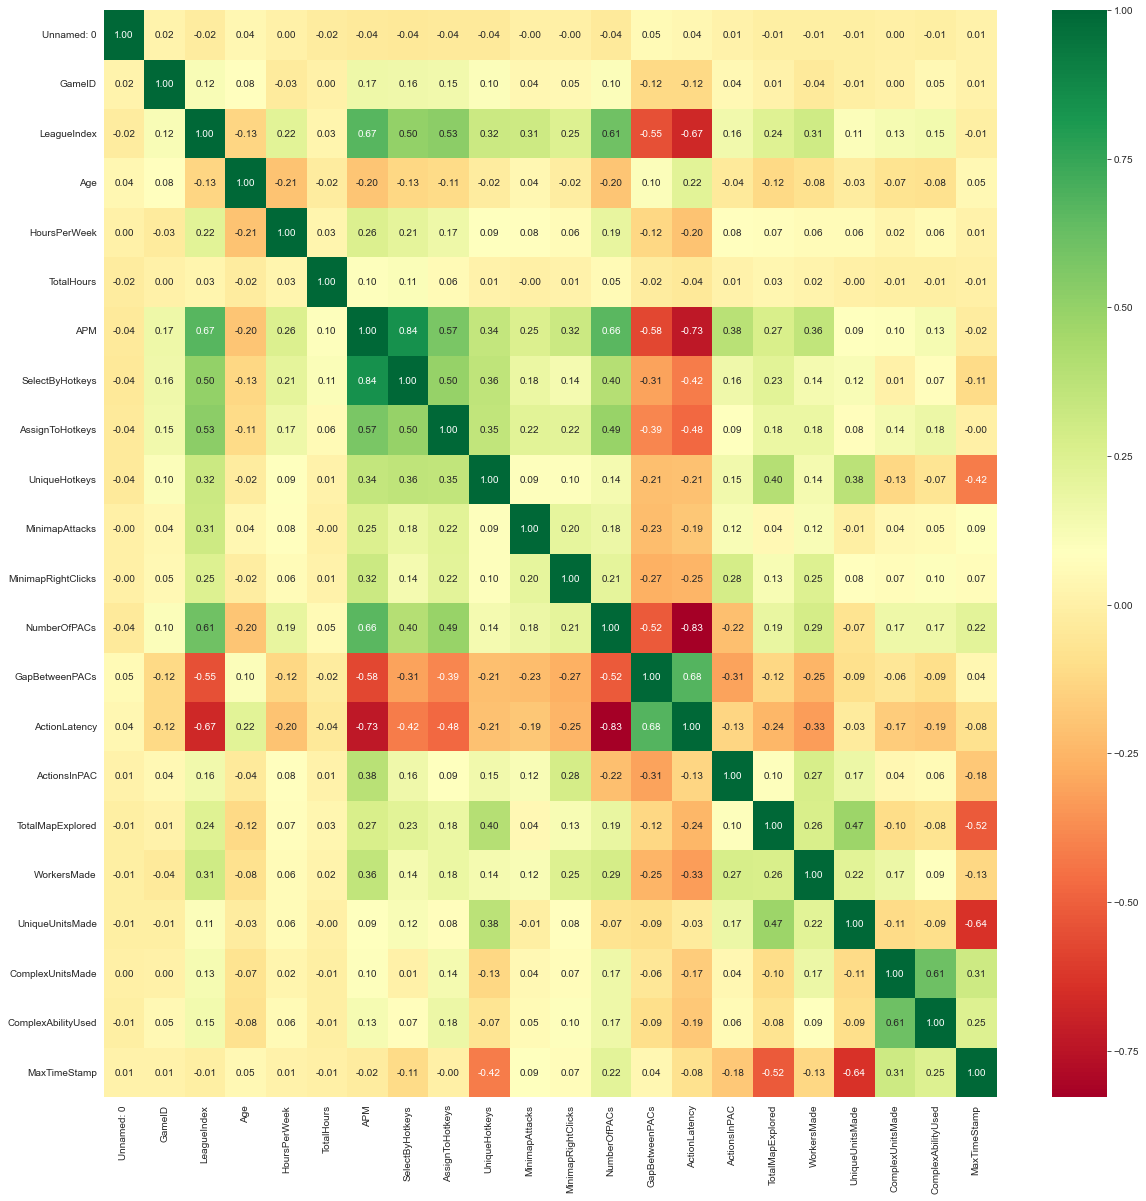

In [3]:
# Correlation matrix
corr = df_train.corr()

plt.figure(figsize=(20,20))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdYlGn', annot=True, fmt='.2f')
plt.show()

Unnamed: 0 null in train: 0, null in test: 0
GameID null in train: 0, null in test: 0
Age null in train: 27, null in test: 28
HoursPerWeek null in train: 28, null in test: 28
TotalHours null in train: 28, null in test: 29
APM null in train: 0, null in test: 0
SelectByHotkeys null in train: 0, null in test: 0
AssignToHotkeys null in train: 0, null in test: 0
UniqueHotkeys null in train: 0, null in test: 0
MinimapAttacks null in train: 0, null in test: 0
MinimapRightClicks null in train: 0, null in test: 0
NumberOfPACs null in train: 0, null in test: 0
GapBetweenPACs null in train: 0, null in test: 0
ActionLatency null in train: 0, null in test: 0
ActionsInPAC null in train: 0, null in test: 0
TotalMapExplored null in train: 0, null in test: 0
WorkersMade null in train: 0, null in test: 0
UniqueUnitsMade null in train: 0, null in test: 0
ComplexUnitsMade null in train: 0, null in test: 0
ComplexAbilityUsed null in train: 0, null in test: 0
MaxTimeStamp null in train: 0, null in test: 0


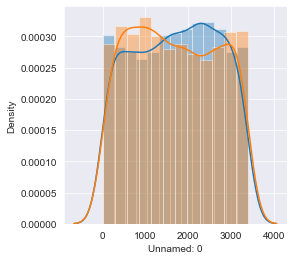

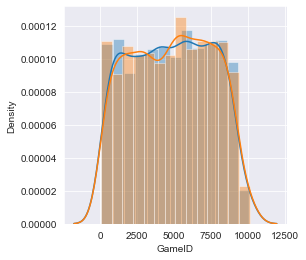

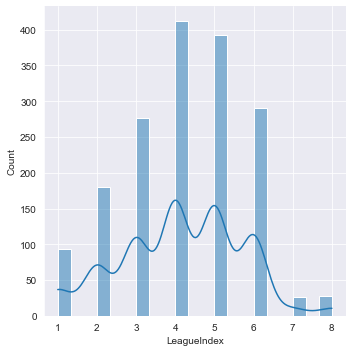

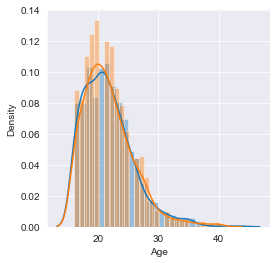

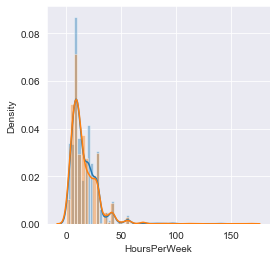

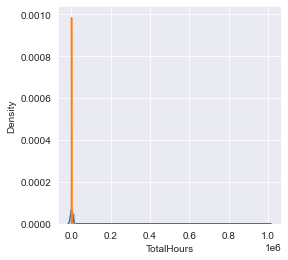

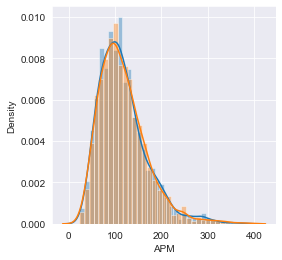

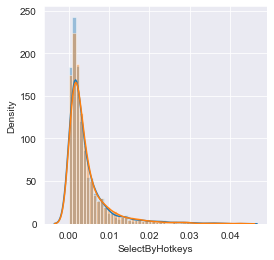

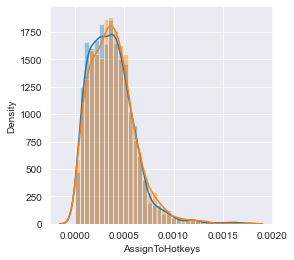

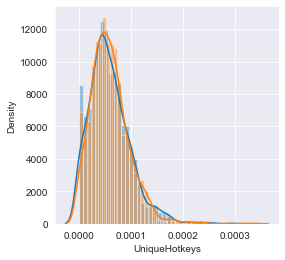

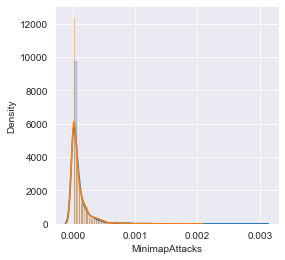

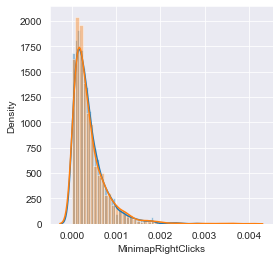

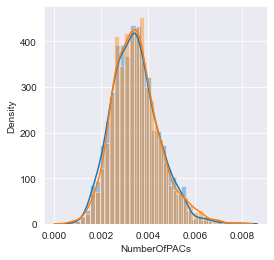

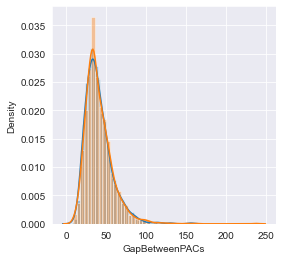

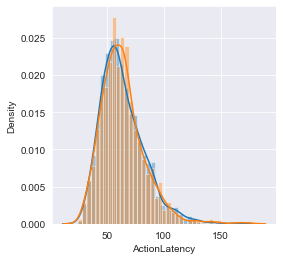

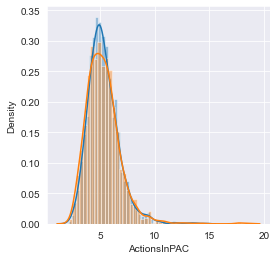

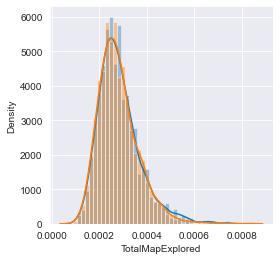

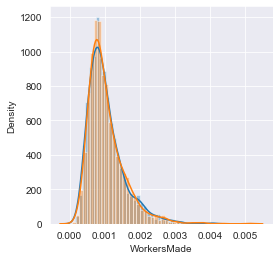

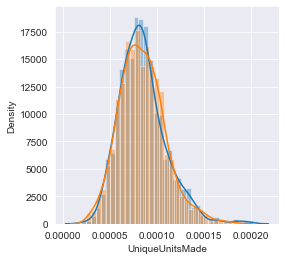

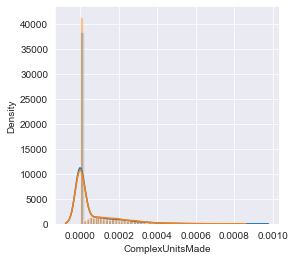

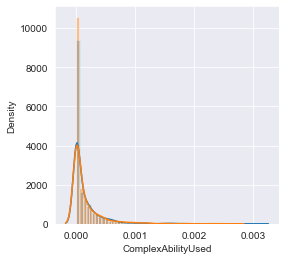

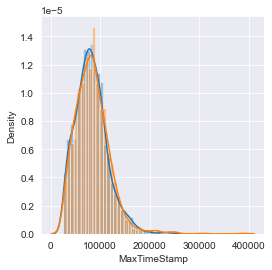

In [3]:
# plot distribution of each feature
import warnings
warnings.filterwarnings('ignore')

for col_train, col_test in zip(df_train.columns, df_train.dtypes):
    if df_train[col_train].dtype == 'object':
        continue

    if col_train == 'LeagueIndex':
        sns.displot(df_train[col_train], kde=True, label='Train')
        continue

    plt.figure(figsize=(4,4))
    sns.distplot(df_train[col_train], kde=True, label='Train')
    sns.distplot(df_test[col_train], kde=True, label='Test')
    # plt.show()
    plt.savefig(col_train)


    # plot distribution of each feature
    null_train = df_train[col_train].isnull().sum()
    null_test = df_test[col_train].isnull().sum()
    print('{} null in train: {}, null in test: {}'.format(col_train, null_train, null_test))